In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv("./data/simulation.csv", index_col=0)

In [15]:
df.head()

,x-position,y-position,time,squared
Particles,,,,
Particles0,-0.883525,9.067322,0,NaN
Particles1,-4.029689,5.757606,0,NaN
Particles2,5.343241,-2.041867,0,NaN
Particles3,-3.349020,3.075715,0,NaN
Particles4,-4.902129,-6.072993,0,NaN


In [16]:
df_boundary = df.iloc[:,-1:]
name = list(df_boundary.keys())

In [17]:
df = df[['x-position','y-position','time']]
df.head()

,x-position,y-position,time
Particles,,,
Particles0,-0.883525,9.067322,0
Particles1,-4.029689,5.757606,0
Particles2,5.343241,-2.041867,0
Particles3,-3.349020,3.075715,0
Particles4,-4.902129,-6.072993,0


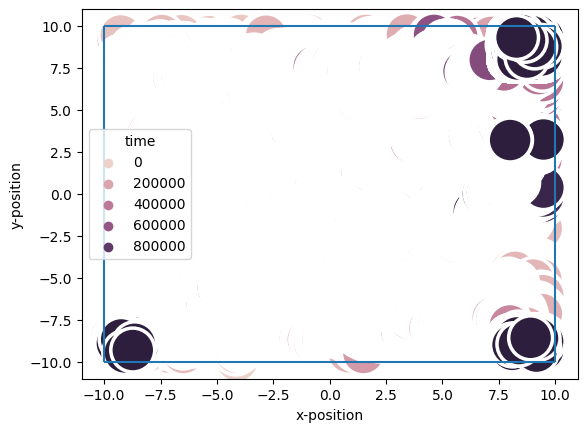

In [18]:
sns.scatterplot(data = df ,x = 'x-position', y = 'y-position', hue = "time", s = 1000.0)
if name[0] == 'squared':
    # squared
    plt.vlines(x = 10, ymin = -10.0, ymax = 10.0)
    plt.vlines(x = -10, ymin = -10.0, ymax = 10.0)
    plt.hlines(y = 10, xmin = -10.0, xmax = 10.0)
    plt.hlines(y = -10, xmin = -10.0, xmax = 10.0)
if name[0] == 'circular':
    # circular
    theta = np.arange(0.0,2.0*np.pi,0.01)
    R = 10.0
    x = R * np.cos(theta)
    y = R * np.sin(theta)
    plt.plot(x,y)

In [19]:
df_index = df.sort_index()
df_index

,x-position,y-position,time
Particles,,,
Particles0,-0.883525,9.067322,0
Particles0,8.055310,9.453797,834500
Particles0,8.424755,8.545862,220700
Particles0,8.472295,8.305301,834400
Particles0,8.275439,8.403188,220800
...,...,...,...
Particles9,-8.956227,-9.434282,515100
Particles9,-9.427164,-9.307044,933000
Particles9,-6.176313,-6.906208,89200


In [20]:
df_particles0 = df_index.loc['Particles0']
df_particles1 = df_index.loc['Particles1']
df_particles2 = df_index.loc['Particles2']
df_particles3 = df_index.loc['Particles3']
df_particles4 = df_index.loc['Particles4']

In [21]:
df_particles0 = df_particles0.sort_values('time')
df_particles1 = df_particles1.sort_values('time')
df_particles2 = df_particles2.sort_values('time')
df_particles3 = df_particles3.sort_values('time')
df_particles4 = df_particles4.sort_values('time')

In [22]:
df_particles4

,x-position,y-position,time
Particles,,,
Particles4,-4.902129,-6.072993,0
Particles4,-4.907102,-6.011144,100
Particles4,-4.911625,-6.042615,200
Particles4,-4.947391,-6.071350,300
Particles4,-4.828434,-6.016474,400
...,...,...,...
Particles4,-8.567932,-8.772101,999500
Particles4,-9.191842,-9.494556,999600
Particles4,-8.575687,-8.814877,999700


In [23]:
# Video
x_particles0 = df_particles0['x-position']
y_particles0 = df_particles0['y-position']
x_particles0_array = x_particles0.to_numpy()
y_particles0_array = y_particles0.to_numpy()

x_particles1 = df_particles1['x-position']
y_particles1 = df_particles1['y-position']
x_particles1_array = x_particles1.to_numpy()
y_particles1_array = y_particles1.to_numpy()

x_particles2 = df_particles2['x-position']
y_particles2 = df_particles2['y-position']
x_particles2_array = x_particles2.to_numpy()
y_particles2_array = y_particles2.to_numpy()

x_particles3 = df_particles3['x-position']
y_particles3 = df_particles3['y-position']
x_particles3_array = x_particles3.to_numpy()
y_particles3_array = y_particles3.to_numpy()

x_particles4 = df_particles4['x-position']
y_particles4 = df_particles4['y-position']
x_particles4_array = x_particles4.to_numpy()
y_particles4_array = y_particles4.to_numpy()


#for i in range(len(x_particles0_array)-100):
i = 0
while i < len(x_particles0_array):
    #if name[0] == 'squared':
    #    # squared
    #plt.vlines(x = 10, ymin = -10.0, ymax = 10.0)
    #plt.vlines(x = -10, ymin = -10.0, ymax = 10.0)
    #plt.hlines(y = 10, xmin = -10.0, xmax = 10.0)
    #plt.hlines(y = -10, xmin = -10.0, xmax = 10.0)
    #if name[0] == 'circular':
    # circular
    theta = np.arange(0.0,2.0*np.pi,0.01)
    R = 10.0
    x = R * np.cos(theta)
    y = R * np.sin(theta)
    plt.plot(x,y)
    
    plt.scatter(x_particles0_array[i],y_particles0_array[i],s=1000)
    plt.scatter(x_particles1_array[i],y_particles1_array[i],s=1000)
    plt.scatter(x_particles2_array[i],y_particles2_array[i],s=1000)
    plt.scatter(x_particles3_array[i],y_particles3_array[i],s=1000)
    plt.scatter(x_particles4_array[i],y_particles4_array[i],s=1000)
    
    plt.savefig('./data/movie/p'+str(i).zfill(5)+'.png')
    plt.clf()
    i += 10

<Figure size 640x480 with 0 Axes>

In [24]:
# ffmpeg -r 24 -f image2 -pattern_type glob -i "*.png" -vcodec libx264 -crf 20 -pix_fmt yuv420p output.mp4